# Importing and exporting graphs
## Import a graph from a pandas Dataframe.

This is better explained with an example.
We will use the [CEO Club Memberships](https://icon.colorado.edu/#!/networks) data.

In [25]:
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd

membership = pd.read_csv("Data/club_membership",skiprows=1,delimiter=" ")
membership.head()

,%,95,25,15
0,1,1,NaN,NaN
1,1,2,NaN,NaN
2,1,3,NaN,NaN
3,2,1,NaN,NaN
4,2,4,NaN,NaN


We have to work a bit with the dataframe first,

We know that the Graph is Bipartite and undirected.

First colum is a member and second column is a Club.

Each row corresponds to an edge, everything else is noise.

Steps to do:
1. Keep only first and second column
2. Rename the columns in Members and Clubs respectively
3. Add a suffix on each entry of `member_` or `club`.
> Third step is required (or any similar solution), since the graph is bipartite 
> and this is an easy way to distinguish the to sets of nodes, since they have same names.

In [26]:
#Step 1
membership.drop(columns=['25','15'], inplace=True)
#Step 2
membership.rename(columns={'%':'Members','95':'Clubs'},inplace=True)
#Step 3
membership['Members'] = membership['Members'].apply(lambda x: f"member_{x}")
membership['Clubs'] = membership['Clubs'].apply(lambda x: f"club_{x}")
membership.head()

,Members,Clubs
0,member_1,club_1
1,member_1,club_2
2,member_1,club_3
3,member_2,club_1
4,member_2,club_4


We can now use the techniques seen in the previous [Notebook](1.Graph_Creation.ipynb).

For improve readability we will first extract the nodes in both Member set and Club set, and get a unique entry list, that will become the vertices of the graph.

We the can:
- iter rows and add the edges (slow way)
- use the function of pandas `to_records` to get an array of tuples. 

> Since the graph is bipartite, we can pass it as an attribute, but `type` must be int or bool.

In [77]:
members = membership['Members'].unique().tolist()
clubs = membership['Clubs'].unique().tolist()
#Also work if is not converted to list (was a ndArray)
edges = membership.to_records(index=False).tolist()

membership_graph = ig.Graph(directed=False)
#Attributes are broadcasted
membership_graph.add_vertices(members,attributes={"type":1})
membership_graph.add_vertices(clubs,attributes={"type":0})

membership_graph.add_edges(edges)

if membership_graph.is_bipartite() : print("The Graph is Bipartite")
print(f"First vertices:{list(membership_graph.vs[:2])}\n")
print(f"Last vertices:{list(membership_graph.vs[-2:])}\n")


The Graph is Bipartite
First vertices:[igraph.Vertex(<igraph.Graph object at 0x7b5e801d5950>, 0, {'name': 'member_1', 'type': 1}), igraph.Vertex(<igraph.Graph object at 0x7b5e801d5950>, 1, {'name': 'member_2', 'type': 1})]

Last vertices:[igraph.Vertex(<igraph.Graph object at 0x7b5e801d5950>, 38, {'name': 'club_14', 'type': 0}), igraph.Vertex(<igraph.Graph object at 0x7b5e801d5950>, 39, {'name': 'club_15', 'type': 0})]



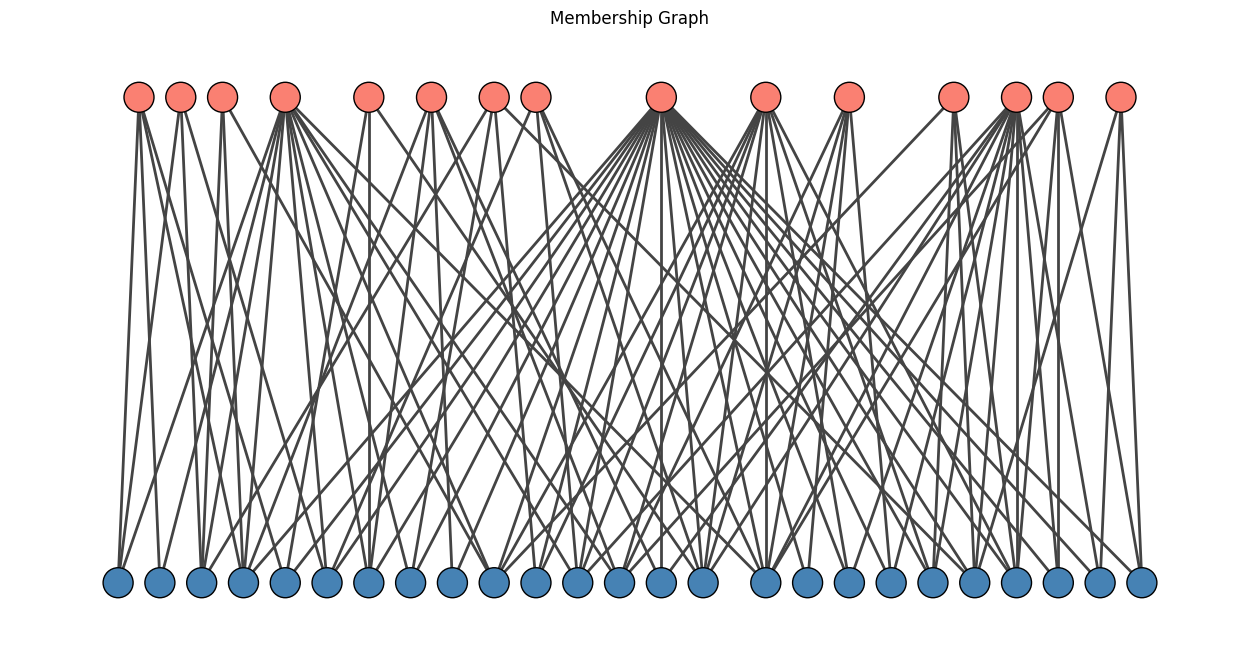

In [81]:
fig, ax = plt.subplots(figsize=(16,8))
plt.title("Membership Graph")

ig.plot(
    membership_graph,
    target=ax,
    layout=membership_graph.layout_bipartite(),
    #vertex_label=membership_graph.vs["name"],
    vertex_color=["steelblue" if type == 1 else "salmon" for type in membership_graph.vs["type"]],
)
plt.show()